# Laboratorio 3
* Silvio Urizar
* Andrés Tejeda

## Problema 1

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [253]:
### Generar dataset
def Generate(n,d):
    np.random.seed(10)
    A = np.random.normal(0,1,size = (n,d))
    x_true = np.random.normal(0,1, size =(d,1))
    b = np.dot(A,x_true) + np.random.normal(0,0.5,size = (n,1))
    return A,b,x_true


In [254]:
### función objetivo
def f(x,A,b):
    return np.sum((np.dot(A,x)-b)**2)


In [255]:
### Solución exacta
def Exact_Solution(A,b):
    solution = np.dot(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)),np.transpose(A)),b)
    obj_func = f(solution,A,b)
    return solution, obj_func

In [256]:
### Gradiente de la función objetivo
def grad(A,b,x):
  gradi = np.dot(np.transpose(A),(np.dot(A,x)-b))
  return gradi

In [257]:
### Solución grad desc
def GD(A,b,lr,max_iter):
  x = np.zeros(A.shape[1])
  x = x.reshape(-1,1)
  loss = []
  iter = []
  for i in range(max_iter):
    iter.append(i)
    x = x - lr*grad(A,b,x)
    lossi = f(x,A,b)
    loss.append(lossi)

#  sns.set_style("whitegrid")
#  plt.title('Función de pérdidas para método GD convencional')
#  plt.xlabel('iteración')
#  plt.ylabel('loss')
#  sns.lineplot(x = iter, y = loss, color = 'darkred')
  return x, loss,iter

In [258]:
### Gradiente estocástico
def SGD(A,b,lr,max_iter):
  x = np.zeros(A.shape[1]).reshape(-1,1)
  loss = []
  iter = []
  for i in range(max_iter):
    rand = random.randint(0,len(A)-1)
    x = x - lr*grad(A[rand].reshape(1,-1),b[rand],x)
    lossi = f(x,A,b)
    loss.append(lossi)
    iter.append(i)
#  sns.set_style("whitegrid")
#  plt.title('Función de pérdidas para método GD estocástico')
#  plt.xlabel('iteración')
#  plt.ylabel('loss')
#  sns.lineplot(x = iter, y = loss, color = 'pink')
  return x, loss, iter

In [259]:
### Gradiente MiniBatch
def MBGD(A,b,lr,max_iter,bs):
  x = np.zeros(A.shape[1]).reshape(-1,1)
  loss = []
  iter = []
  batch_size = bs
  batches = int(len(b)/batch_size)
  for i in range (max_iter):
    for j in range(batches-1):
      x = x - lr*grad(A[(j*batch_size):(j*batch_size + 1)],b[(j*batch_size):(j*batch_size + 1)],x)
    loss.append(f(x,A,b))
    iter.append(i)
  #sns.set_style("whitegrid")
  #plt.title('Función de pérdidas para método mini-batch')
  #plt.xlabel('iteración')
  #plt.ylabel('loss')
  #sns.lineplot(x = iter, y = loss, color = 'darkgreen')
  return x,loss,iter


In [301]:
A,b,x_true = Generate(100,4)
betas, error = Exact_Solution(A,b)


In [302]:
x,loss,iter = MBGD(A,b,0.005,1000,10)

In [303]:
x

array([[ 0.47058026],
       [-0.86560266],
       [ 0.51478261],
       [ 0.55059425]])

In [263]:
betas

array([[0.14778054],
       [1.1200304 ]])

In [264]:
x,loss,iter = SGD(A,b,0.005,1000)

In [265]:
x

array([[0.15567709],
       [1.12276855]])

In [266]:
x, loss, iter = GD(A,b,0.005,1000)

## Parte 1

In [299]:
betas, error = Exact_Solution(A,b)
print(betas)

[[0.14778054]
 [1.1200304 ]]


## parte 2

In [291]:
def parte_2(A,b,step1,step2,step3,max_iter):
  x1,loss1,iter1 = GD(A,b,step1,max_iter)
  x2,loss2,iter2 = GD(A,b,step2,max_iter)
  x3,loss3,iter3 = GD(A,b,step3,max_iter)
  data = {
      'iteración' : iter1,
      'step_size1' : loss1,
      'step_size2' : loss2,
      'step_size3' : loss3
  }
  data = pd.DataFrame(data)
  sns.set_style('whitegrid')
  plt.title('Función de pérdidas para GD clásico')
  plt.xlabel('iteración')
  plt.ylabel('loss')
  sns.lineplot(x = 'iteración', y = 'value', hue = 'variable', data = pd.melt(data,['iteración']),palette = ['darkred','orange','purple'])

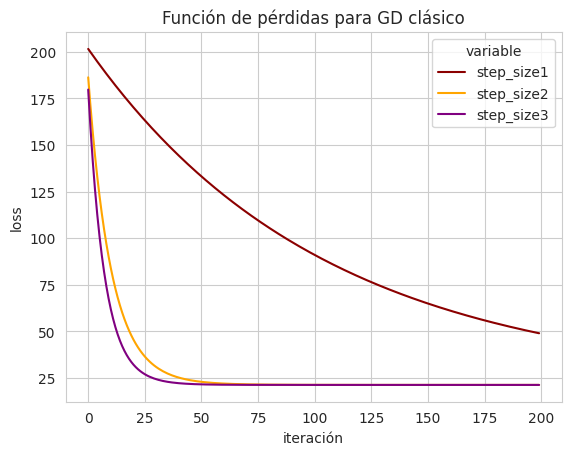

In [304]:
parte_2(A,b,5E-5,5E-4,7E-4,200)

## Parte 3

In [292]:
def parte_3(A,b,step1,step2,step3,max_iter):
  x1,loss1,iter1 = SGD(A,b,step1,max_iter)
  x2,loss2,iter2 = SGD(A,b,step2,max_iter)
  x3,loss3,iter3 = SGD(A,b,step3,max_iter)
  data = {
      'iteración' : iter1,
      'step_size1' : loss1,
      'step_size2' : loss2,
      'step_size3' : loss3
  }
  data = pd.DataFrame(data)
  sns.set_style('whitegrid')
  plt.title('Función de pérdidas para GD estocástico')
  plt.xlabel('iteración')
  plt.ylabel('loss')
  sns.lineplot(x = 'iteración', y = 'value', hue = 'variable', data = pd.melt(data,['iteración']),palette = ['pink','black','violet'])

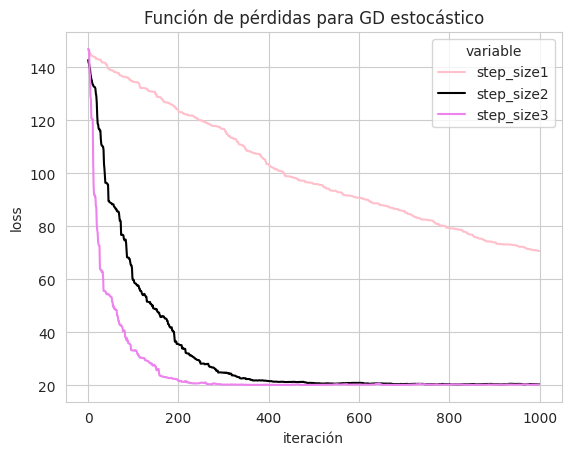

In [293]:
parte_3(A,b,5E-4,5E-3,0.01,1000)

## Parte 4

In [297]:
def parte_4(A,b,step1,step2,step3,batch1,batch2,batch3,max_iter):
  x1,loss1,iter1 = MBGD(A,b,step1,max_iter,batch1)
  x2,loss2,iter2 = MBGD(A,b,step2,max_iter,batch1)
  x3,loss3,iter3 = MBGD(A,b,step3,max_iter,batch1)
  x4,loss4,iter4 = MBGD(A,b,step1,max_iter,batch2)
  x5,loss5,iter5 = MBGD(A,b,step2,max_iter,batch2)
  x6,loss6,iter6 = MBGD(A,b,step3,max_iter,batch2)
  x7,loss7,iter7 = MBGD(A,b,step1,max_iter,batch3)
  x8,loss8,iter8 = MBGD(A,b,step2,max_iter,batch3)
  x9,loss9,iter9 = MBGD(A,b,step3,max_iter,batch3)
  data = {
      'iteración' : iter1,
      'step_size1_batch1' : loss1,
      'step_size2_batch1' : loss2,
      'step_size3_batch1' : loss3,
      'step_size1_batch2' : loss4,
      'step_size2_batch2' : loss5,
      'step_size3_batch2' : loss6,
      'step_size1_batch3' : loss7,
      'step_size2_batch3' : loss8,
      'step_size3_batch3' : loss9
  }
  data = pd.DataFrame(data)
  sns.set_style('whitegrid')
  plt.title('Función de pérdidas para GD minibatch')
  plt.xlabel('iteración')
  plt.ylabel('loss')
  sns.lineplot(x = 'iteración', y = 'value', hue = 'variable', data = pd.melt(data,['iteración']),palette = ['darkred','darkblue','purple','darkgreen','pink','darkorange','lightgreen','yellow','cyan'])

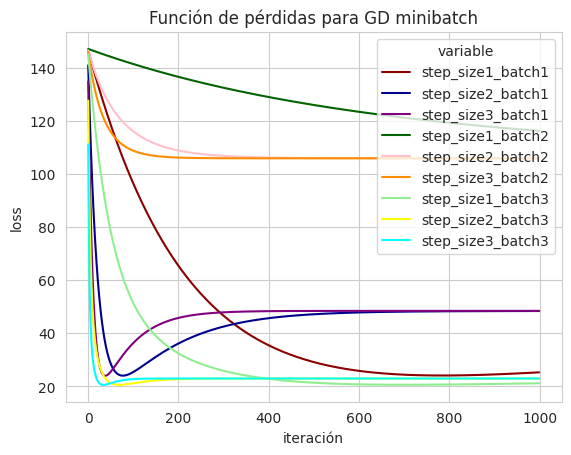

In [298]:
parte_4(A,b,5E-4,5E-3,0.01,25,50,10,1000)

# Problema 2

In [305]:
### función del problema 2

def g(v):
  x = v[0]
  y = v[1]
  return 100*(y-x**2)**2+(1-x)**2

In [306]:
### Gradiente de la función del problema 2
def dg(v):
  x = v[0]
  y = v[1]
  return np.array([-1*(400*x*(y-x**2)+2*(1-x)),200*(y-x**2)]).reshape(-1,1)

In [432]:
### Hessiana de la función del problema 2
def hess(v):
  x = v[0]
  y = v[1]
  hessian = np.array([[-400*(y-x**2)+800*x**2+2,-400*x],[-400*x,np.array([200])]]).reshape(2,2)
  return hessian

## GD con Backtracking Line Search

In [498]:
def GDBT(g,dg,v,lr,max_iter,ban,t):
  v = np.array(v)
  v = v.reshape(-1,1)
  loss = []
  iter = []
  lrs = []
  pks = []
  xks = []
  maggrads = []
  for i in range(max_iter):
    lrs.append(lr)
    lossi = g(v)
    loss.append(lossi[0])
    pk = -dg(v)
    pks.append(pk)
    mgrad = np.sqrt(np.sum(dg(v)**2))
    maggrads.append(mgrad)
    xks.append(v)
    if ban == 1:
      val1 = g(v-lr*dg(v))
      val2 = g(v)-0.5*lr*np.sum(dg(v)**2)
      while val1 > val2:
        lr = t*lr
        val1 = g(v-lr*dg(v))
        val2 = g(v)-0.5*lr*np.sum(dg(v)**2)
    v = v -lr*dg(v)

    iter.append(i)
  data = {
      'iteraciones' : iter,
      'xk' : xks,
      'pk' : pks,
      'mag(pk)' : maggrads,
      'learnin_rate' : lrs,
      'pérdidas' : loss
  }
  data = pd.DataFrame(data)
  return data

In [501]:
D = GDBT(g,dg,[0,0],1,15000,1,0.3)


## Newton con Backtracking Line Search

In [502]:
def Nwton(g,dg,hess,v,lr,max_iter,ban,t):
  v = np.array(v).reshape(-1,1)
  loss = []
  iter = []
  lrs = []
  pks = []
  xks = []
  maggrads = []
  for i in range(max_iter):
    lrs.append(lr)
    xks.append(v)
    pk = -np.dot(np.linalg.inv(hess(v)),dg(v))
    pks.append(pk)
    mgrad = np.sqrt(np.sum(dg(v)**2))
    maggrads.append(mgrad)
    if ban == 1:
      val1 = g(v-lr*np.dot(np.linalg.inv(hess(v)),dg(v)))
      val2 = g(v)-0.5*lr*np.dot(dg(v).transpose(),np.dot(np.linalg.inv(hess(v)),dg(v)))
      while(val1 > val2):
        lr = t*lr
    v = v-lr*np.dot(np.linalg.inv(hess(v)),dg(v))
    lossi = g(v)
    loss.append(lossi[0])
    iter.append(i)
  data = {
      'iteraciones' : iter,
      'xk' : xks,
      'pk' : pks,
      'mag(pk)' : maggrads,
      'learning_rate' : lrs,
      'pérdidas' : loss
  }
  data = pd.DataFrame(data)
  return data


In [503]:
#x,loss,iter = GD(A,b,5E-3,10)
Nwton(g,dg,hess,[0,0],5E-3,2000,1,0.3)

,iteraciones,xk,pk,mag(pk),learning_rate,pérdidas
0,0,"[[0], [0]]","[[1.0], [-0.0]]",2.000000,0.005,9.900251e-01
1,1,"[[0.005], [0.0]]","[[0.9900497512437811], [0.009925497512437811]]",1.989956,0.005,9.801988e-01
2,2,"[[0.009950248756218905], [4.962748756218906e-05]]","[[0.9803676476595391], [0.019559183896271613]]",1.979928,0.005,9.705169e-01
3,3,"[[0.014852086994516601], [0.000147423407043547...","[[0.9709408958898587], [0.028914158385629277]]",1.969916,0.005,9.609757e-01
4,4,"[[0.019706791473965896], [0.0002919941989716935]]","[[0.9617575568880496], [0.038002674675434056]]",1.959922,0.005,9.515713e-01
...,...,...,...,...,...,...
1995,1995,"[[0.9999329882773795], [0.9998657479949288]]","[[6.700859934428112e-05], [0.00013424126836641...",0.000062,0.005,4.451157e-09
1996,1996,"[[0.9999333233203762], [0.9998664192012706]]","[[6.667358749933682e-05], [0.00013357016911324...",0.000062,0.005,4.406758e-09
1997,1997,"[[0.9999336566883137], [0.9998670870521161]]","[[6.634025040290359e-05], [0.00013290242428822...",0.000061,0.005,4.362803e-09
1998,1998,"[[0.9999339883895657], [0.9998677515642376]]","[[6.600857968432465e-05], [0.00013223801712986...",0.000061,0.005,4.319286e-09


In [494]:
v

array([[0.99993465],
       [0.99986907]])